In [137]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ipywidgets import widgets
import seaborn as sns
from scipy.signal import find_peaks
from time import time
import feather
import xlsxwriter 
from  scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose

# Limpieza de datos

In [11]:
def dtfr():
    df = pd.read_excel("datos/Consumo horario Zonas de carga de la GCROC 2015-2020.xlsx", sheet_name="datos")
    return df

In [ ]:
dtfr().head()

##### Remoción de primer encabezado y cambio de nombres en segundo encabezado

In [14]:
def lim_header():
    dfi = dtfr()
    dfi.columns = dfi.iloc[0]
    dfi = dfi.drop(index=0)
    dfi.rename(columns = {"día de la semana" : "día_semana"}, inplace=True )
    dfi.rename(columns = {pd.NaT : "fechas"}, inplace = True)
    return dfi

In [ ]:
lim_header().head()

##### Relleno día semana y fecha 

In [17]:
def lim_relleno():
    df = lim_header()
    dia_sem = df["día_semana"].tolist()
    fech = df["fecha"].tolist()
    hor = df["hora"].tolist()
    indx = 0
    for h in hor:
        if h == 1:
            fecha = fech[indx]
            diaa = dia_sem[indx]
            indx += 1
        elif h != 1:
            fech[indx] = fecha
            dia_sem[indx] = diaa
            indx += 1
    df["fecha"] = fech
    df["día_semana"] = dia_sem
    return df

In [ ]:
lim_relleno().head()

#### Remplazo de valores no numéricos

In [12]:
def lim_Nnum():
    df = lim_relleno()
    df['year'] = pd.DatetimeIndex(df["fechas"]).year
    df['month'] = pd.DatetimeIndex(df["fechas"]).month
    df['day'] = pd.DatetimeIndex(df["fechas"]).day

    df = df.replace(["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"], [0, 1, 2, 3, 4, 5, 6])
    df = df.replace(["Miércoles", "Sábado"],[2,5])

    df = df.drop(["fecha","fechas"], axis=1)
    df = df.dropna()
    
    return df

In [60]:
def lim_Nnum():
    df = lim_relleno()
    df['year'] = pd.DatetimeIndex(df["fecha"]).year
    df['month'] = pd.DatetimeIndex(df["fecha"]).month
    df['day'] = pd.DatetimeIndex(df["fecha"]).day

    df = df.replace(["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"], [0, 1, 2, 3, 4, 5, 6])
    df = df.replace(["Miércoles", "Sábado"],[2,5])

    df.columns = df.columns.fillna('to_drop')
    df.drop('to_drop', axis = 1, inplace = True)
#     df = df.drop(["fecha","fechas"], axis=1)
    df = df.dropna()
    
    return df

In [121]:
ones = df.set_index("fecha")
hora_1 = ones[ones["hora"]==3]
part = hora_1.ZCCI84BA14.tail(100)
result=seasonal_decompose(part, model='multiplicative')
# plt.figure(figsize=(20,5

#### Cambio de nombre a zonas de carga

In [123]:
def lim_nomzon():
    df = lim_Nnum()
    zonas = df.columns
    elim = ["día_semana", "hora", "day", "year", "month", "fecha"]
    zonas = zonas.drop(elim)
    son = ["zona_{}".format(i+1) for i in range(len(zonas))]
    listDic={}
    for zona, so in zip(zonas, son):
        listDic[zona]=so
    df.rename(columns = listDic, inplace=True )
    return df

###### llama los datos más rapido

In [250]:
lim_nomzon().to_pickle("dflimpios.pkl")

In [ ]:
df[df["hora"]==3]["zona_9"]

In [165]:
df = lim_nomzon()

In [241]:
cas = df.query("hora == 2")

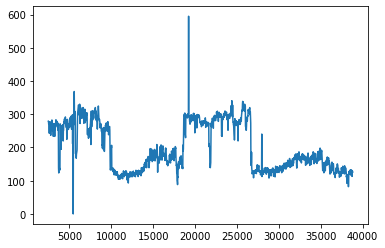

In [242]:
plt.plot(cas.zona_9)

In [243]:
ones = df.set_index("fecha")
hora_1 = ones[ones["hora"]==2]
part = hora_1.zona_9.tail(100)
result = seasonal_decompose(part, model='multiplicative')
tab = result.seasonal.reset_index(drop = True)

In [244]:
t = np.arange(1,100)
sen = np.abs(np.sin(((2*np.pi)/14)*t))
cos = np.abs(np.cos(((2*np.pi)/14)*t))

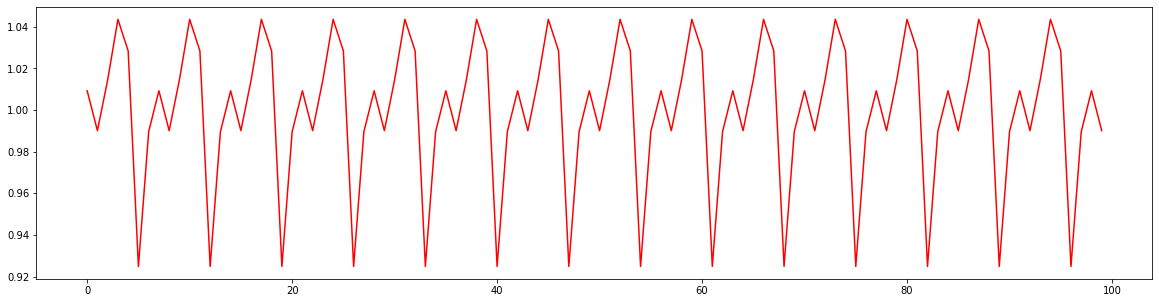

In [245]:
plt.figure(figsize=(20, 5))
plt.plot(tab, c ='red')
# plt.plot(t-2, ((sen+cos)*0.47)+0.4, c='black')

In [246]:
f, asd = signal.periodogram(tab, fs=1)

C:\Users\alber\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


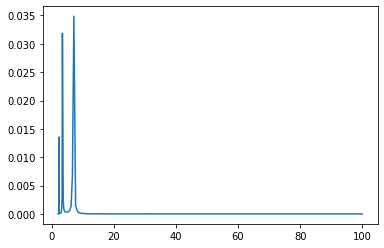

In [247]:
plt.plot(1/f, asd)

In [248]:
peaks, _ = find_peaks(asd, height=0)

In [249]:
peaks

array([14, 29, 43], dtype=int64)